<div class="head0">
    <div class="head0__name">
        Diffusion equation with zero drift in 3D case
    </div>
    <div class="head0__note">
        Solution of the 3D Fokker-Planck equation with zero drift by fast and accurate tensor based method.
    </div>
</div>

Note that since interpolation is not required for the case of zero drift ($f \equiv 0$), but our solver calculates it by design, then it is expected to operate much slower than another simple solvers.

In [1]:
import sys
import time

import numpy as np
import scipy.sparse as sp
from scipy.integrate import solve_ivp
from scipy.linalg import expm as expm
import matplotlib.pyplot as plt

sys.path.extend(['./../lib', './../helpers'])
from intertrain import Intertrain
from solver import Solver as Solver

from helpers import init_jupyter; init_jupyter()

Start |  2:23PM MSK on Sep 07, 2019 |
-------------------------------------


<div class="head1">
    <div class="head1__name">
        Model problem
    </div>
</div>

Consider 3D equation with zero drift
$$
    dx = d\beta,
    \quad
    \frac{\partial \rho}{\partial t} = D \Delta \rho,
    \quad
    \rho(x, 0) = \rho_0(x),
$$
where
$$
    x \in \Omega = [-5, 5],
    \quad
    \rho(x, t) |_{\partial \Omega} \approx 0,
    \quad
    \rho_0(x) = \frac{1}{(2 \pi s)^{\frac{3}{2}}}\exp{\left[-\frac{|x|^2}{2s}\right]},
    \quad
    s = 1,
    \quad
    D = 1,
$$
with known analytic solution
$$
    \rho(x, t) =
        \frac
            {
                1
            }
            {
                (2 \pi s + 4 \pi D t)^{\frac{3}{2}}
            }
        \exp{ \left[
            - \frac
                {
                    |x|^2
                }
                {
                    2  s + 4 D t
                }
        \right] },
$$
with the zero stationary ($t \rightarrow \infty$) solution.

In [19]:
s = 10.
Dc = 0.1

def func_f0(x, t):
    return np.zeros(x.shape)

def func_f1(x, t):
    return np.zeros(x.shape)

def func_r0(x):
    r = np.exp(-1. * np.sum(x*x, axis=0) / (2. * s))
    r/= (2. * np.pi * s)**1.5
    return r.reshape(-1)

def func_rt(x, t):
    r = np.exp(-1. * np.sum(x*x, axis=0) / (2. * s + 4. * Dc * t))
    r/= (2. * np.pi * s + 4. * np.pi * Dc * t)**1.5
    return r.reshape(-1)

def func_rs(x):
    return np.zeros(x.shape[1])

<div class="head1">
    <div class="head1__name">
        Parameters
    </div>
</div>

In [17]:
t_poi = 100
t_min = 0.
t_max = 0.1

x_poi = 21
x_min = -5.
x_max = +5.

<div class="head1">
    <div class="head1__name">
        Solution by the solver in the NP-format
    </div>
</div>

In [18]:
SL = Solver(d=3)
SL.set_grid_t(t_poi, t_min, t_max, t_hst=10)
SL.set_grid_x(x_poi, x_min, x_max)
SL.set_funcs(func_f0, func_f1, func_r0, func_rt, func_rs)
SL.set_coefs(Dc)

SL.prep()
SL.calc()

Solve: 100%|█| 99/99 [01:33<00:00,  1.16s/step, | At T=1.00e-01 : n=3.84e-04 e=9.93e-01 es=9.93e-01]


In [13]:
SL.info()

----------- Solver
Format    : 3D, NP [order=2]
Grid x    : poi =        11, min =   -5.0000, max =    5.0000
Grid t    : poi =       100, min =    0.0000, max =    0.1000 , hst =        10
Time sec  : prep = 1.33e-01, calc = 9.46e+00, spec = 1.57e+09
Err calc  : 9.93e-01
Err stat  : 9.93e-01


<div class="head2">
    <div class="head2__name">
        Solution near boundaries
    </div>
    <div class="head2__note">
        Solution is zero near the boundaries as expected, but real values are not equal to zero.
    </div>
</div>

--- Solution at spatial point
X = [-5.0e+00,-5.0e+00,-5.0e+00]


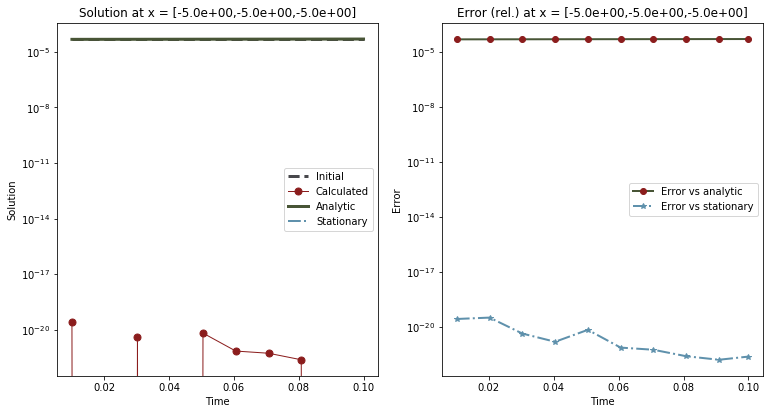

--- Solution at spatial point
X = [ 5.0e+00, 5.0e+00, 5.0e+00]


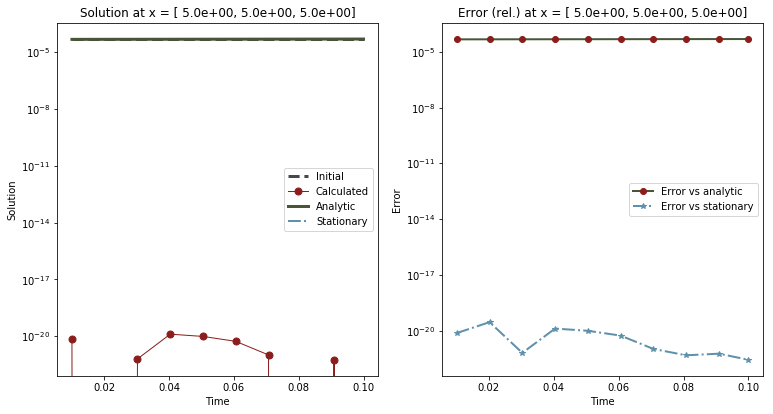

In [14]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': True }
SL.plot_t([x_min]*3, opts)
SL.plot_t([x_max]*3, opts)

<div class="head2">
    <div class="head2__name">
        Solution in the inner points
    </div>
    <div class="head2__note">
        Solution is very accurate.
    </div>
</div>

--- Solution at spatial point
X = [-1.5e+00,-1.5e+00,-1.5e+00]


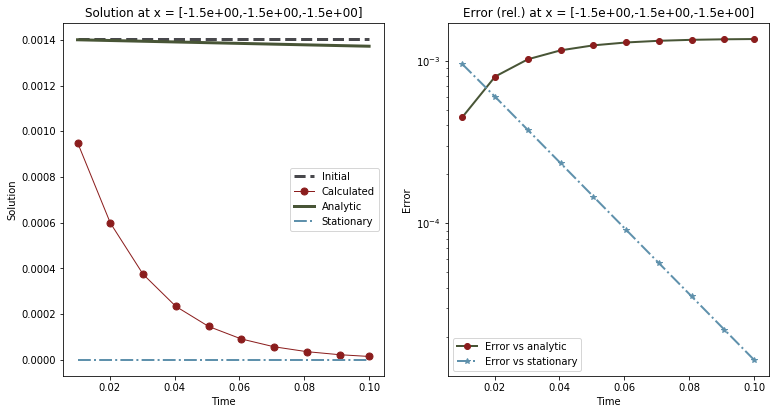

--- Solution at spatial point
X = [ 3.1e-16, 3.1e-16, 3.1e-16]


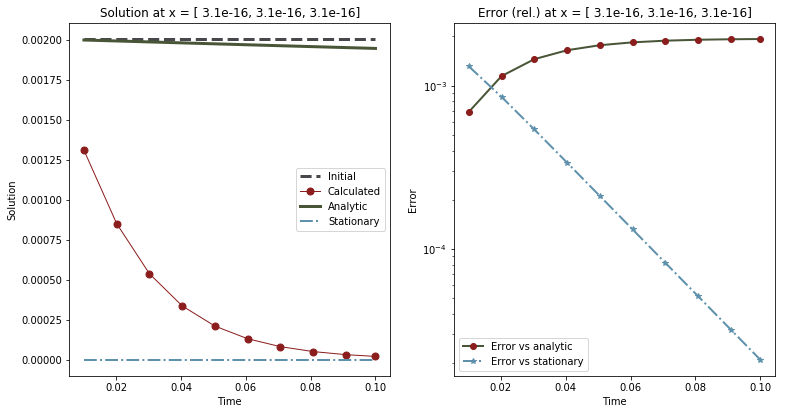

--- Solution at spatial point
X = [ 1.5e+00, 1.5e+00, 1.5e+00]


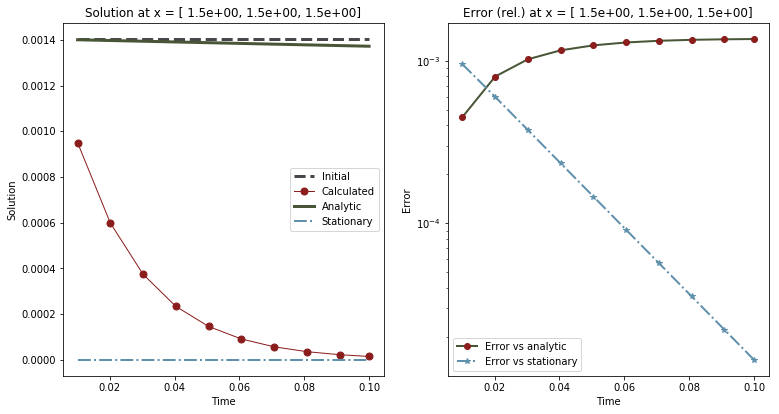

In [15]:
opts = { 'is_log': False, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': True }
SL.plot_t([-1.5]*3, opts)
SL.plot_t([+0.0]*3, opts)
SL.plot_t([+1.5]*3, opts)

<div class="head2">
    <div class="head2__name">
        Solution for different time moments
    </div>
    <div class="head2__note">
        Solution is very accurate.
    </div>
</div>

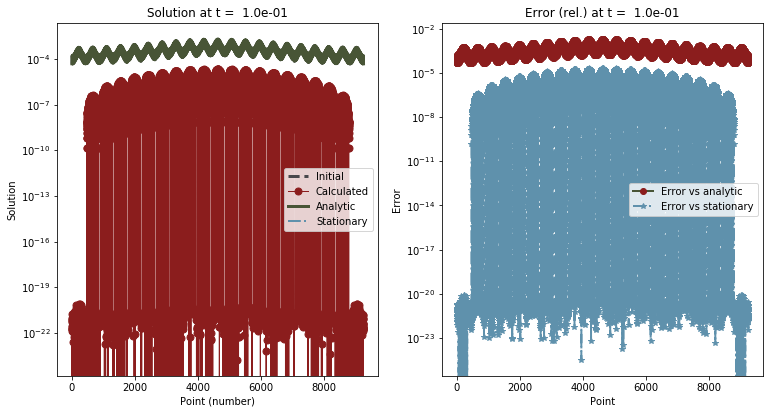

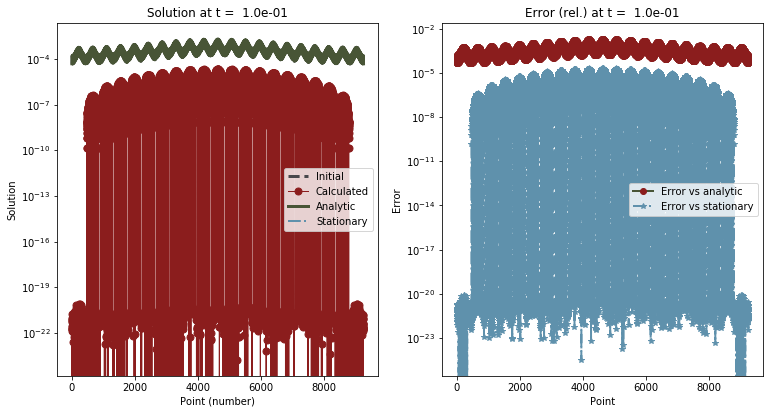

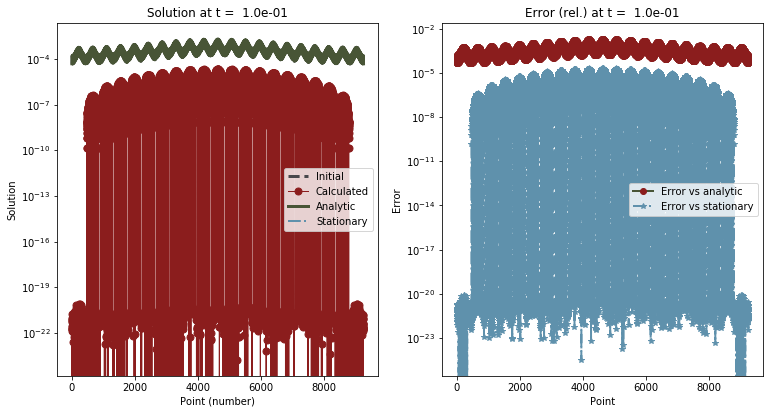

In [20]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': True }
SL.plot_x(0.1, opts)
SL.plot_x(0.5, opts)
SL.plot_x(None, opts)

<div class="head1">
    <div class="head1__name">
        Solution by the solver in the TT-format
    </div>
</div>

In [9]:
SL = Solver(d=3, with_tt=True)
SL.set_grid_t(t_poi, t_min, t_max, t_hst=10)
SL.set_grid_x(x_poi, x_min, x_max)
SL.set_funcs(func_f0, func_f1, func_r0, func_rt, func_rs)
SL.set_coefs(Dc)

SL.prep()
SL.calc()

Solve:   0%|                                            | 0/9 [00:00<?, ?step/s]

ValueError: shapes (1331,1331) and (11,) not aligned: 1331 (dim 1) != 11 (dim 0)

In [ ]:
SL.info()

<div class="head2">
    <div class="head2__name">
        Solution near boundaries
    </div>
    <div class="head2__note">
        Solution is zero near the boundaries as expected, but real values are not equal to zero.
    </div>
</div>

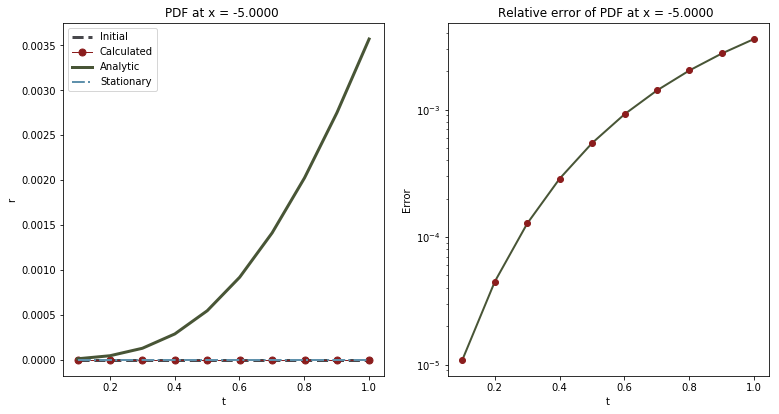

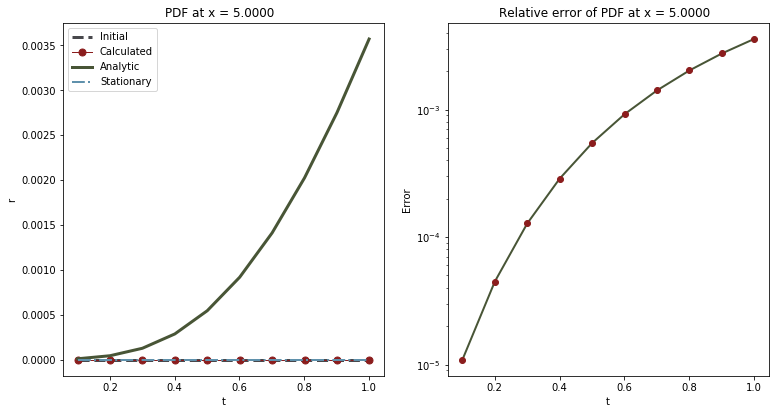

In [10]:
SL.plot_t(x=x_min)
SL.plot_t(x=x_max)

<div class="head2">
    <div class="head2__name">
        Solution in the inner points
    </div>
    <div class="head2__note">
        Solution is very accurate.
    </div>
</div>

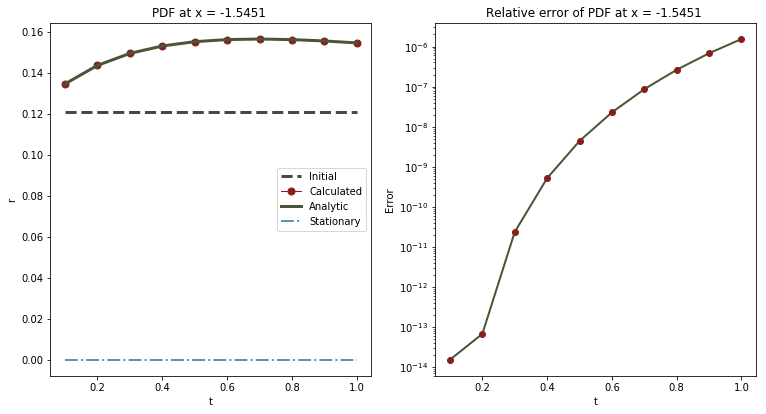

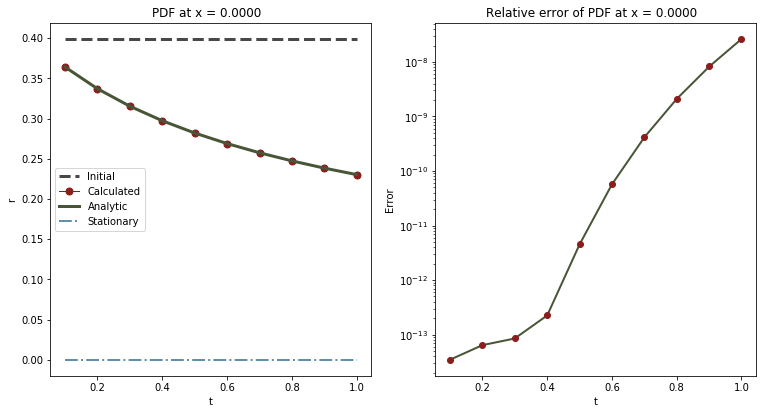

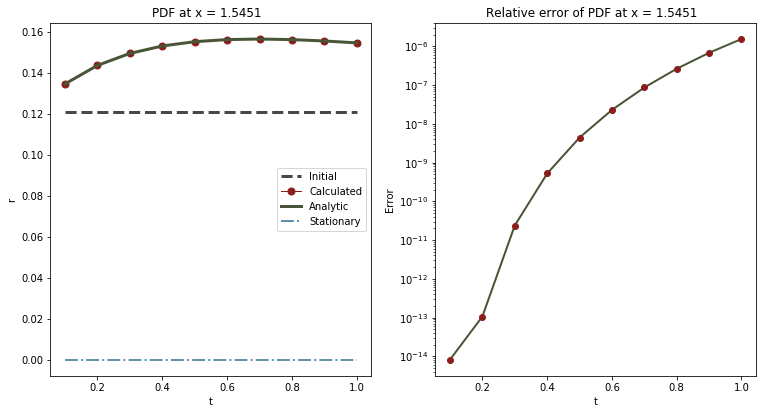

In [11]:
SL.plot_t(x=-1.5)
SL.plot_t(x=+0.0)
SL.plot_t(x=+1.5)

<div class="head2">
    <div class="head2__name">
        Solution for different time moments
    </div>
    <div class="head2__note">
        Solution is very accurate.
    </div>
</div>

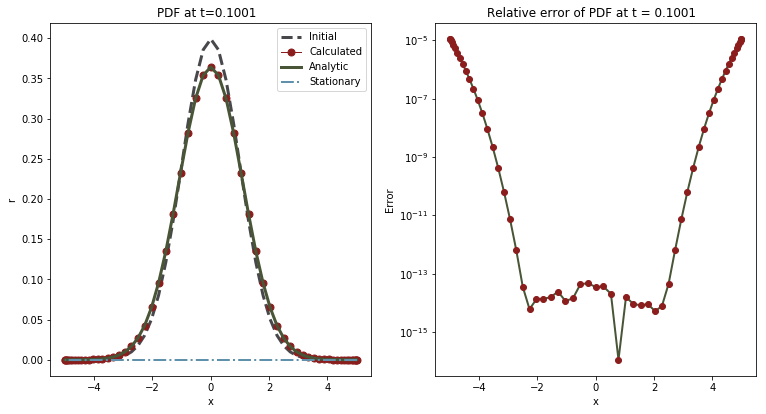

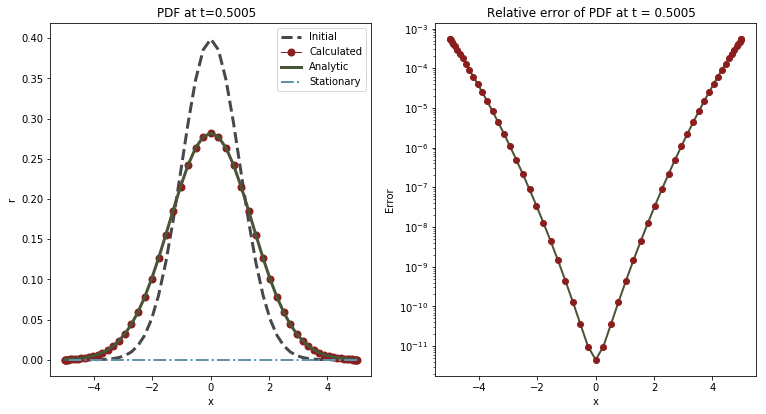

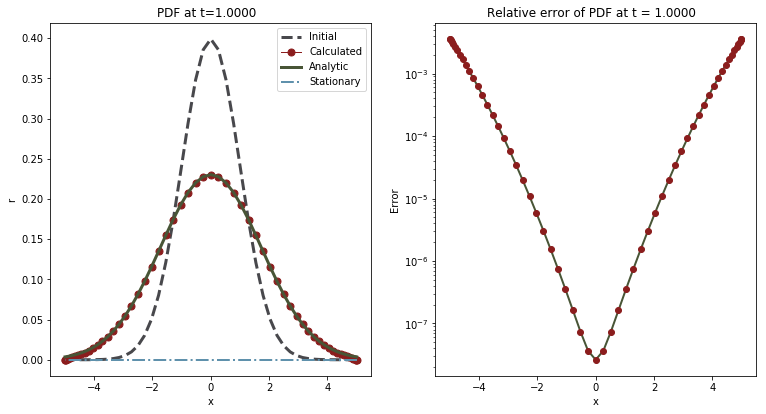

In [12]:
SL.plot_x(t=0.1)
SL.plot_x(t=0.5)

<div class="head2">
    <div class="head2__name">
        Solution at the final time moment
    </div>
    <div class="head2__note">
        Solution is very accurate.
    </div>
</div>

In [ ]:
SL.plot_x()

<div class="head1">
    <div class="head1__name">
        Accuracy vs number of spatial points
    </div>
    <div class="head1__note">
        Note that analytic solution is small but not zero at boundaries, hence the integral (norm) error is not small for any grid size.
    </div>
</div>

In [19]:
m = 1000
N = [10, 50, 100, 200]
Times = []
Errors = []

for n in N:
    SL = Solver(d=1)
    SL.set_grid_t(m, t_min, t_max, t_hst=1)
    SL.set_grid_x(n, x_min, x_max)
    SL.set_funcs(func_f0, func_f1, func_r0, func_rt, func_rs)
    SL.set_coefs(Dc)
    SL.prep()
    SL.calc()
    Times.append([SL._t_prep, SL._t_calc, SL._t_spec])
    Errors.append(SL._err)

Solve: 100%|█| 999/999 [00:07<00:00, 132.08step/s, | At T = 1.00e+00 : error = 1.53e-02]


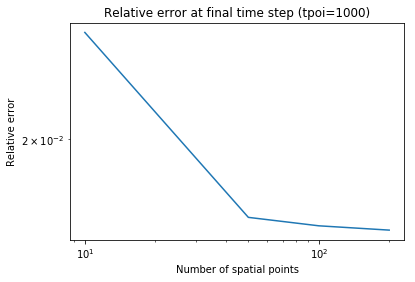



Solver info for n = 200, m = 1000 : 
----------- Solver
Format    : 1D, NP [order=1]
Grid x    : poi =       200, min =   -5.0000, max =    5.0000
Grid t    : poi =      1000, min =    0.0000, max =    1.0000 , hst =         1
Time sec  : prep = 4.06e-02, calc = 7.49e+00, spec = 1.57e+09
Rel.err.  : 1.53e-02


In [20]:
plt.plot(N, Errors)
plt.semilogx()
plt.semilogy()
plt.title('Relative error at final time step (tpoi=%d)'%m)
plt.xlabel('Number of spatial points')
plt.ylabel('Relative error')
plt.show()

print('\n\nSolver info for n = %d, m = %d : '%(N[-1], m))
SL.info()

<div class="head1">
    <div class="head1__name">
        Accuracy vs number of time points
    </div>
    <div class="head1__note">
        Note that analytic solution is small but not zero at boundaries, hence the integral (norm) error is not small for any grid size.
    </div>
</div>

In [21]:
M = [10, 100, 1000, 5000, 10000]
n = 100
Times = []
Errors = []

for m in M:
    SL = Solver(d=1)
    SL.set_grid_t(m, t_min, t_max, t_hst=1)
    SL.set_grid_x(n, x_min, x_max)
    SL.set_funcs(func_f0, func_f1, func_r0, func_rt, func_rs)
    SL.set_coefs(Dc)
    SL.prep()
    SL.calc()
    Times.append([SL._t_prep, SL._t_calc, SL._t_spec])
    Errors.append(SL._err)

Solve: 100%|█| 9999/9999 [00:34<00:00, 289.02step/s, | At T = 1.00e+00 : error = 1.55e-02]


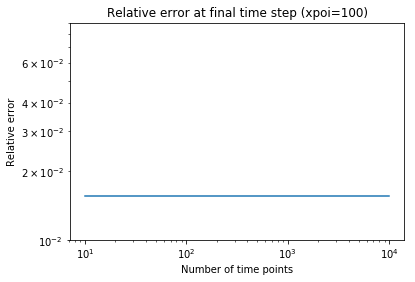



Solver info for n = 100, m = 10000 : 
----------- Solver
Format    : 1D, NP [order=1]
Grid x    : poi =       100, min =   -5.0000, max =    5.0000
Grid t    : poi =     10000, min =    0.0000, max =    1.0000 , hst =         1
Time sec  : prep = 7.65e-03, calc = 3.43e+01, spec = 1.57e+09
Rel.err.  : 1.55e-02


In [27]:
plt.plot(M, Errors)
plt.semilogx()
plt.semilogy()
plt.ylim(1.E-2, 9.E-2)
plt.title('Relative error at final time step (xpoi=%d)'%n)
plt.xlabel('Number of time points')
plt.ylabel('Relative error')
plt.show()

print('\n\nSolver info for n = %d, m = %d : '%(n, M[-1]))
SL.info()

<div class="head1">
    <div class="head1__name">
        Conclusion
    </div>
    <div class="head1__note">
        As we can see, for diffusion process without drift term our solver works absolutely correct but rather slow. Since analytic solution is small but not zero at boundaries, the integral (norm) error is not small for any grid size, but at selected points (far from the border) we have very accurate solution (relative error is about $10^{-8})$.
    </div>
    </div>
</div>

<div class="end"></div>